This Notebook will step you through reading in snapshots from a galaxy merger simulation, making images of the stellar surface density, and making a movie of the stellar distribution over time.

First of all we need to get the data that we're going to work with:

In [ ]:
! git clone https://github.com/TStarkenburg/GalaxyMergerExample.git

Then we need to initialize the packages we will use

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
%matplotlib inline

Now we need to make a folder where we can put all the images that we create.

In [ ]:
! mkdir images


Ok, so now we're ready to start making images. First lets explore our snapshot files: what is in there?

In [ ]:
snapfile = h5.File('GalaxyMergerExample/data/stars_snapshot_000.hdf5', 'r')
print ("opening snapshot 0")
list(snapfile['PartType2'].keys())

opening snapshot 0


['Coordinates', 'ParticleIDs', 'Potential', 'Velocity']

Ok. So a snapshot has different types of particles, and those particles have coordinates (positions), velocities, and such. Let's make an image for the first snapshot, using just the coordinates of the particles.

opening snapshot 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


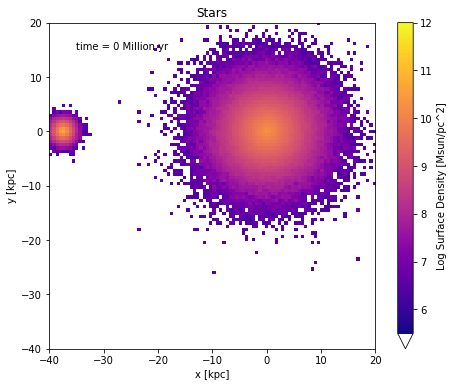

In [ ]:
snapfile = h5.File('GalaxyMergerExample/data/stars_snapshot_000.hdf5', 'r')
print ("opening snapshot 0")

pos1 = snapfile['PartType2/Coordinates'][:,:]
pos2 = snapfile['PartType3/Coordinates'][:,:]
pos = np.concatenate((pos1, pos2), axis = 0)
mass = np.concatenate((np.repeat(2.0e-8*1.0e10/0.73, len(pos1[:,0])),np.repeat(2.0e-8*1.0e10/0.73, len(pos2[:,0]))),axis = 0)

plt.subplots(1,1,figsize=[8,6])
maxsize = 60
nbins = 100
binopp = (2.0*1000*maxsize/nbins)**2 #in pc^2
histdisk, xedges, yedges = np.histogram2d(-pos[:,1], pos[:,0], range = [[-20, 40],[-40, 20]], bins=nbins, weights = mass[:]*1.0e10/0.73/binopp)
im = plt.imshow(np.log10(histdisk*(histdisk > 10*2.0e-8*1.0e10/0.73/binopp)), extent = (-40, 20, -40, 20), cmap='plasma', vmin = 5.5, vmax = 12)
plt.text(-35, 15, 'time = %0.0f Million yr' %(0), color = 'black')
im.cmap.set_under('white')
cbar1 = plt.colorbar(extend = 'min')
plt.axis([-40, 20, -40, 20])
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.title('Stars')
cbar1.set_label('Log Surface Density [Msun/pc^2]', rotation=90)
plt.show()

Ah, so now we can read the snapshots and make images. Now, i've already automated that process for all snapshots for you. So the follwing uses a for-loop to step through all snapshots and make images and save those in our "images" folder.

In [ ]:
for snapshot in range(201):
    snapfile = h5.File('GalaxyMergerExample/data/stars_snapshot_%03d.hdf5' %(snapshot*2), 'r')
    print ("opening snapshot", snapshot*2)

    pos1 = snapfile['PartType2/Coordinates'][:,:]
    pos2 = snapfile['PartType3/Coordinates'][:,:]
    if snapshot > 0:
        posn = snapfile['PartType4/Coordinates'][:,:]
        massn = snapfile['PartType4/Mass'][:]*1.0e10/0.73
        pos = np.concatenate((pos1, pos2, posn), axis = 0)
        mass = np.concatenate((np.repeat(2.0e-8*1.0e10/0.73, len(pos1[:,0])),np.repeat(2.0e-8*1.0e10/0.73, len(pos2[:,0])),massn),axis = 0)
    else:
        pos = np.concatenate((pos1, pos2), axis = 0)
        mass = np.concatenate((np.repeat(2.0e-8*1.0e10/0.73, len(pos1[:,0])),np.repeat(2.0e-8*1.0e10/0.73, len(pos2[:,0]))),axis = 0)

    plt.subplots(1,1,figsize=[8,6])
    maxsize = 60
    nbins = 100
    binopp = (2.0*1000*maxsize/nbins)**2 #in pc^2
    histdisk, xedges, yedges = np.histogram2d(-pos[:,1], pos[:,0], range = [[-20, 40],[-40, 20]], bins=nbins, weights = mass[:]*1.0e10/0.73/binopp)
    im = plt.imshow(np.log10(histdisk*(histdisk > 10*2.0e-8*1.0e10/0.73/binopp)), extent = (-40, 20, -40, 20), cmap='plasma', vmin = 5.5, vmax = 12)
    plt.text(-35, 15, 'time = %0.0f Million yr' %(snapshot*10*2), color = 'black')
    im.cmap.set_under('white')
    cbar1 = plt.colorbar(extend = 'min')
    plt.axis([-40, 20, -40, 20])
    plt.xlabel('x [kpc]')
    plt.ylabel('y [kpc]')
    plt.title('Stars')
    cbar1.set_label('Log Surface Density [Msun/pc^2]', rotation=90)
    plt.savefig('images/stars_%03d.png' %snapshot)
    plt.close()

opening snapshot 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


opening snapshot 2
opening snapshot 4
opening snapshot 6
opening snapshot 8
opening snapshot 10
opening snapshot 12
opening snapshot 14
opening snapshot 16
opening snapshot 18
opening snapshot 20
opening snapshot 22
opening snapshot 24
opening snapshot 26
opening snapshot 28
opening snapshot 30
opening snapshot 32
opening snapshot 34
opening snapshot 36
opening snapshot 38
opening snapshot 40
opening snapshot 42
opening snapshot 44
opening snapshot 46
opening snapshot 48
opening snapshot 50
opening snapshot 52
opening snapshot 54
opening snapshot 56
opening snapshot 58
opening snapshot 60
opening snapshot 62
opening snapshot 64
opening snapshot 66
opening snapshot 68
opening snapshot 70
opening snapshot 72
opening snapshot 74
opening snapshot 76
opening snapshot 78
opening snapshot 80
opening snapshot 82
opening snapshot 84
opening snapshot 86
opening snapshot 88
opening snapshot 90
opening snapshot 92
opening snapshot 94
opening snapshot 96
opening snapshot 98
opening snapshot 100
ope

Now we just need to take all these images that we've created and connect them together in a movie.

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

video_name = 'stars.mp4'

images = []
for i in range(201):
    images.append('images/stars_%03d.png' %(i))

# Determine the width and height from the first image
frame = cv2.imread(images[0])
#cv2_imshow(frame)
height, width, channels = frame.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Be sure to use lower case
out = cv2.VideoWriter(video_name, fourcc, 20.0, (width, height))

for image in images:
    frame = cv2.imread(image)

    out.write(frame) # Write out frame to video

    #cv2_imshow(frame)
    if (cv2.waitKey(1) & 0xFF) == ord('q'): # Hit `q` to exit
        break

# Release everything if job is finished
out.release()
cv2.destroyAllWindows()

print("The output video is {}".format(video_name))

The output video is stars.mp4
